In [1]:
%matplotlib inline
from utils import plots # Plotting helper to display images we are working with
from vgg16 import Vgg16 # Our VGG16 pre-trained network that we will augment for the kaggle challenge

Using Theano backend.


In [2]:
# Instantiate our image recognition model
vgg = Vgg16()
data_path = 'data/sample/'

Found 16 images belonging to 2 classes.


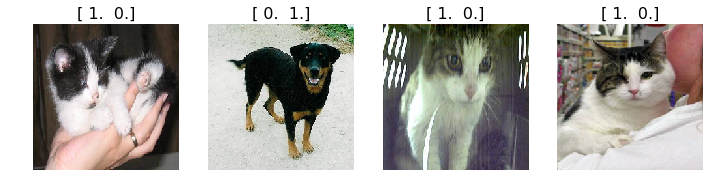

In [3]:
# Lets take a look at a few images and labels that we are working with
batches = vgg.get_batches(data_path + 'train', batch_size=4)
imgs,labels = next(batches)
plots(imgs, titles=labels)

In [4]:
# We can call predict with the pre-trained model to get very specific classes from the 1000 
# that the VGG16 was trained on
vgg.predict(imgs, True)

(array([ 0.16127916,  0.79137826,  0.0664674 ,  0.09164404], dtype=float32),
 array([333, 234, 380, 281]),
 ['hamster', 'Rottweiler', 'titi', 'tabby'])

In [5]:
# Now lets get our actual batches of training and validation data
batch_size=64
batches = vgg.get_batches(data_path + 'train', batch_size=batch_size)
val_batches = vgg.get_batches(data_path + 'valid', batch_size=batch_size)

Found 16 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [6]:
# Here we finetune the model to output only two classes, cats or dogs, rather than the original 1000
vgg.finetune(batches)

In [7]:
# Fit the finetuned model to our data
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
16/16 [==============================] - 7s - loss: 1.4188 - acc: 0.5625 - val_loss: 0.5653 - val_acc: 0.6250
